In [1]:
print("all ok")

all ok


In [2]:
from dotenv import load_dotenv
import os
load_dotenv()

True

In [3]:
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")

In [4]:
if not GOOGLE_API_KEY:
    raise ValueError("GOOGLE_API_KEY is missing in your .env")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [6]:
chat_llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [7]:
chat_llm.invoke("Hello, how are you?")

AIMessage(content="Hello! As an AI, I don't have feelings, but I'm functioning perfectly and ready to help.\n\nThank you for asking! How are you doing today?", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c90f5-d3f6-7a03-9331-ddee8cc31a4a-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 7, 'output_tokens': 199, 'total_tokens': 206, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 163}})

In [8]:
from typing_extensions import TypedDict, Annotated
import operator

In [9]:
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage

In [10]:
class GraphState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]

In [11]:
{
    "messages": [HumanMessage(content="Hi, this is Sunny. Say hello in detail.")]
}

{'messages': [HumanMessage(content='Hi, this is Sunny. Say hello in detail.', additional_kwargs={}, response_metadata={})]}

In [12]:
def llm_call(state: GraphState) -> dict:
    """Call the LLM using conversation messages and append AI response."""
    response = chat_llm.invoke(state["messages"])  # AIMessage
    return {
        "messages": [response]
    }

In [13]:
def token_counter(state: GraphState) -> dict:
    """Count tokens (simple word count) in the last AI message."""
    last_msg = state["messages"][-1]
    text = last_msg.content
    token_number = len(text.split())
    summary = f"Total token number in the generated answer (word count) is {token_number}"
    return {
        "messages": [AIMessage(content=summary)]
    }

In [14]:
from langgraph.graph import StateGraph,START,END

In [15]:
!pip install IPython

In [16]:
from IPython.display import Image, display

In [17]:
builder=StateGraph(GraphState)

In [18]:
builder.add_node("llm_call",llm_call)
builder.add_node("token_counter",token_counter)

In [19]:

builder.add_edge(START,"llm_call")
builder.add_edge("llm_call","token_counter")
builder.add_edge("token_counter",END)

In [20]:
app=builder.compile()

In [21]:
print(app.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])


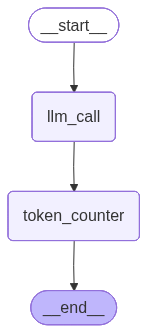

In [22]:
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
result=app.invoke({
    "messages":[HumanMessage(content="Hi this is Geetha.Say Hello in detail")]
})

In [24]:
result

{'messages': [HumanMessage(content='Hi this is Geetha.Say Hello in detail', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello Geetha!\n\nA very warm and detailed welcome to you!\n\nConsider this greeting a digital handshake, a friendly nod across the virtual space, and an open invitation to communicate. I\'m here, fully attentive and ready to listen, understand, and assist you in any way I can.\n\nIt\'s truly wonderful to hear from you. My "hello" signifies that my processors are awake, my knowledge base is accessible, and I\'m eager to engage. Whether you have a specific question, a task you need help with, an idea to discuss, or just want to chat, please feel free to share.\n\nI\'m looking forward to our interaction. So, Geetha, what\'s on your mind today?', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c90f5-edd0-7700-9b12-9ee13439e511-0

In [25]:
for msg in result['messages']:
    print(type(msg).__name__," : ",msg.content)


HumanMessage  :  Hi this is Geetha.Say Hello in detail
AIMessage  :  Hello Geetha!

A very warm and detailed welcome to you!

Consider this greeting a digital handshake, a friendly nod across the virtual space, and an open invitation to communicate. I'm here, fully attentive and ready to listen, understand, and assist you in any way I can.

It's truly wonderful to hear from you. My "hello" signifies that my processors are awake, my knowledge base is accessible, and I'm eager to engage. Whether you have a specific question, a task you need help with, an idea to discuss, or just want to chat, please feel free to share.

I'm looking forward to our interaction. So, Geetha, what's on your mind today?
AIMessage  :  Total token number in the generated answer (word count) is 110


In [26]:
chat_llm


ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'text_inputs': True, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'text_outputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-2.5-flash', client=<google.genai.client.Client object at 0x000001A0F764D550>, default_metadata=(), model_kwargs={})

In [27]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper


In [28]:
api_wrapper=WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)

In [29]:
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper)

In [30]:
wiki_tool.run({
    "query":"Generative AI"
})

'Page: Generative artificial intelligence\nSummary: Generative artificial intelligence, also known as generative AI or GenAI, is a subfield of artificial intelligence that uses generative models to generate text, images, videos, audio, software code or other forms of data. These models learn the underlying patterns and structures of their training data, and use them to generate new data in response to input, which often takes the form of natural language prompts.\nThe prevalence of generative AI to'

In [31]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")

In [32]:
tool=TavilySearchResults(tavilly_api_key=TAVILY_API_KEY)

C:\Users\phani\AppData\Local\Temp\ipykernel_7052\2494850146.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tool=TavilySearchResults(tavilly_api_key=TAVILY_API_KEY)


In [33]:
tool.invoke({"query":"how is the job market for fresher grad in 2026"})

[{'title': 'Worst College-Grad Job Market Predicted for 2026 Amid AI ...',
  'url': 'https://www.linkedin.com/posts/ariannahuffington_its-a-rough-job-market-for-those-just-starting-activity-7403807042215481344-Stfm',
  'content': 'It’s a rough job market for those just starting out. Lindsay Ellis reports in The Wall Street Journal that a survey of employers predicts that 2026 will be the worst college-grad job market in five years. And an August survey by the early-career job-search platform Handshake found that postings for full-time jobs declined more than 16% year-over-year, while each job has an average of 26% more applications. Factors include economic uncertainty, tariffs and, of course, AI. A recent survey by the American Psychological Association found that 57% of adults say the rise of AI is a significant source of stress. The number for students: 78%, nearly double the 45% from last year. It’s clear that AI needs a bigger narrative. CEOs and leaders are all very excited. But 

In [34]:
from langchain_community.tools import DuckDuckGoSearchRun
ddgsr=DuckDuckGoSearchRun()

In [35]:
ddgsr.invoke("what is the latest update on iphone 17 release")

Impersonate 'firefox_117' does not exist, using 'random'


'Apple has unveiled four new iPhones : the iPhone 17 , iPhone Air, iPhone 17 Pro and iPhone 17 Pro Max. Here\'s the lowdown on the specs, price, new features, design, dimensions and more. The first major iPhone software update of 2026 is here and is a mix of new features and security fixes. Read on for how the release has been received, and what\'s in it, so you can decide if it ... The iPhone 17e will continue to be Apple\'s only new release iPhone without 120Hz support. 120Hz refresh rates provide video improvements and smoother scrolling when viewing webpages. Apple today announced iPhone 17 , featuring the new Center Stage front camera, a 48MP Fusion Main camera, and a new 48MP Fusion Ultra Wide camera. Apple has unveiled the iPhone 17 during its "Awe Dropping" event, showcasing all the improvements, colors and more.'

In [36]:
from langchain_community.tools import YouTubeSearchTool
tool=YouTubeSearchTool()

In [37]:
tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [38]:
tool.invoke("Geetha Phani")

"['https://www.youtube.com/watch?v=YWQVnWeuDDQ&pp=ygUMR2VldGhhIFBoYW5p', 'https://www.youtube.com/watch?v=-cP8nRmv8MI&pp=ygUMR2VldGhhIFBoYW5p']"

In [39]:
from langchain.tools import tool

In [40]:
@tool("multiply-tool")
def multiply(a:int,b:int)->int:
    '''this tool is for multiplication'''
    return a*b

In [41]:
multiply.run({"a":10,"b":20})

200

In [42]:
multiply.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [43]:
multiply.name

'multiply-tool'

In [44]:
multiply.description

'this tool is for multiplication'

In [45]:
@tool
def get_word_length(word:str)->int:
    """This is the tool  for calculating the length of the  sentence """
    return len(word)

In [46]:
get_word_length.run("Geetha Naga Durga Lahari Maddu")

30

In [47]:
@tool
def call_gmail_api(args):
    """this is tool to call gmail"""
    pass

In [48]:
import yfinance as yf


In [49]:
@tool
def get_stock_price(ticker:str)->str:
    """This is the tool to get the stock price usig yfinance"""
    try:
        stock=yf.Ticker(ticker)
        data=stock.history(period="1d")
        if data.empty:
            return f"No data fount for the ticker '{ticker}' . Please check the symbol again."
        latest_close=data["Close"].iloc[-1]
        currency=stock.info.get("currency","")
        symbol_map={
            
            "INR": "₹",
            "USD": "$",
            "EUR": "€",
            "GBP": "£"
        }
        symbol=symbol_map.get(currency,"")
        currency_text=currency if currency else ""
        if symbol:
            return f"The last closing price of {ticker.upper()} was {symbol}{latest_close:.2f}."
        else:
            return f"The last closing price of {ticker.upper()} was {latest_close:.2f} {currency_text}"
    except Exception as e:
        return f"An error occured while fetching stock data: {str(e)}"




In [50]:
get_stock_price.run("HDFCBANK.NS")

'The last closing price of HDFCBANK.NS was ₹910.50.'

In [51]:
tools=[get_stock_price,get_word_length,multiply,wiki_tool]

In [52]:
llm_with_tools= chat_llm.bind_tools(tools)

In [53]:
res=llm_with_tools.invoke("what is the stock price of TCS.NS")

In [54]:
res.content

''

In [55]:
res.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'TCS.NS'},
  'id': '46621e3f-0cbc-43db-b0bb-a10aa5bff7c3',
  'type': 'tool_call'}]

In [56]:
res2=llm_with_tools.invoke("what is the lenght of this sentence 'Geetha Naga Durga Lahari Maddu'")

In [57]:
res2.content

''

In [58]:
res2.tool_calls

[{'name': 'get_word_length',
  'args': {'word': 'Geetha Naga Durga Lahari Maddu'},
  'id': 'f425026c-a6ad-4f68-8a05-f594c816341a',
  'type': 'tool_call'}]

In [59]:
res3=llm_with_tools.invoke("multiply 2 and 3")

In [60]:
res3.content

''

In [61]:
res3.tool_calls

[{'name': 'multiply-tool',
  'args': {'a': 2, 'b': 3},
  'id': 'e63034a5-560e-4723-bd39-586abdd40ac3',
  'type': 'tool_call'}]

In [65]:
from langchain_core.messages import HumanMessage,SystemMessage
from langgraph.graph import MessagesState,StateGraph,END,START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [86]:
SYSTEM_PROMPT=SystemMessage(content="You are helpful assistant that can use tools to answer questions.")

In [87]:
def function_1(state:MessagesState):
    user_question=state["messages"]
    input_question=[SYSTEM_PROMPT]+user_question
    response=llm_with_tools.invoke(input_question)
    return {
        "messages":[response]
    }

In [89]:
tools

[StructuredTool(name='get_stock_price', description='This is the tool to get the stock price usig yfinance', args_schema=<class 'langchain_core.utils.pydantic.get_stock_price'>, func=<function get_stock_price at 0x000001A0F708A480>),
 StructuredTool(name='get_word_length', description='This is the tool  for calculating the length of the  sentence', args_schema=<class 'langchain_core.utils.pydantic.get_word_length'>, func=<function get_word_length at 0x000001A0E8B0C860>),
 StructuredTool(name='multiply-tool', description='this tool is for multiplication', args_schema=<class 'langchain_core.utils.pydantic.multiply-tool'>, func=<function multiply at 0x000001A0F70F51C0>),
 WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'c:\\Users\\phani\\anaconda3\\Lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=5, lang='en', load_all_available_meta=False, doc_content_chars_max=500))]

In [101]:
function_2=ToolNode(tools)

In [102]:
workflow=StateGraph(MessagesState)

In [103]:
workflow.add_node("llm",function_1)

In [104]:
workflow.add_node("tools",function_2)

In [105]:
workflow.add_edge(START,"llm")

In [106]:
workflow.add_conditional_edges(
    "llm",
    tools_condition
)

In [107]:
workflow.add_edge("tools","llm")

In [108]:
workflow.add_edge("llm",END)

In [109]:
app=workflow.compile()

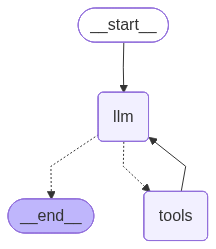

In [110]:
from IPython.display import Image,display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [113]:
result=app.invoke({
    "messages":[HumanMessage(content="multiply 10 and 20")]
})

In [114]:
result

{'messages': [HumanMessage(content='multiply 10 and 20', additional_kwargs={}, response_metadata={}, id='a25b16ec-6cf8-4af1-a620-d844b1d0fc5c'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply-tool', 'arguments': '{"a": 10, "b": 20}'}, '__gemini_function_call_thought_signatures__': {'21ddf2ca-a2c5-4e1d-b579-55cae1a0bf1e': 'CpQCAb4+9vvWaXg6IOwJJLFrD9hlXec+/KfV1euKECINRJlBPonmK3jeTRKnYFCUkG87bEo5xG1CgchB5SQEV0boeMJwwcVxt1nb3/lrMNWIXgeuX+h36ieee9O56wpW0t9J0IbVz5hNzIBSY2P6y9BGeeGNMdtIYnaW+bKp56dtbhECMv+Otx8kIcoSiavRcleyFzsdAR6wzBBrwpaotgcPoeNWf+UmNQB0Va4r8x+orEd/NRE7nO/QouRrzAxs+hfnnog61B6Au4QJeNVOzH+T7pTVX9hK0E3PAu6a4Ak8jnOmDWu0DX4fgDR1DHPNIXuP2Zh12ld9Ss/nA8rirQPv2LpbNxBDOwbAOjxyNSa6Rj6zA4cR'}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c9126-ed8a-7e52-97ce-0a7eaf2a2e17-0', tool_calls=[{'name': 'multiply-tool', 'args': {'a': 10, 'b': 20}, 'id': '21ddf2

In [115]:
result=app.invoke({
    "messages":[HumanMessage(content="budget of 2026 USA")]
})

In [116]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

budget of 2026 USA
================================== Ai Message ==================================
Tool Calls:
  wikipedia (7f8766f6-7315-49b6-81dd-5423fc797670)
 Call ID: 7f8766f6-7315-49b6-81dd-5423fc797670
  Args:
    query: budget of 2026 USA
================================= Tool Message =================================
Name: wikipedia

Page: Military budget of the United States
Summary: The military budget of the United States is the largest portion of the discretionary federal budget allocated to the Department of Defense (DoD), or more broadly, the portion of the budget that goes to any military-related expenditures. It pays the salaries, training, and health care of uniformed and civilian personnel, maintains arms, equipment and facilities, funds operations, and develops and buys new items. The budget funds six branches of 
================================== Ai Message =========================